<a href="https://colab.research.google.com/github/ShoroukGamal/machine-learning-projects/blob/main/supervised/iris_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace=True)

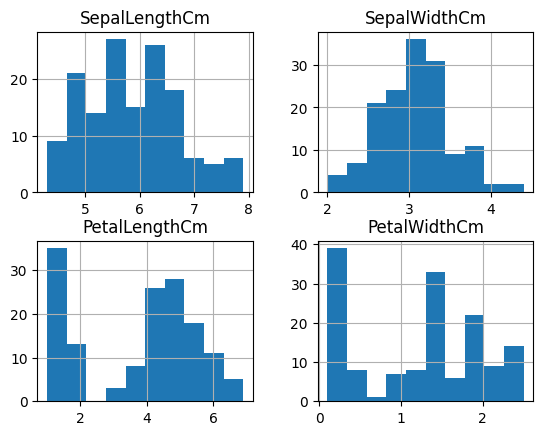

In [ ]:
df.hist()
plt.show()

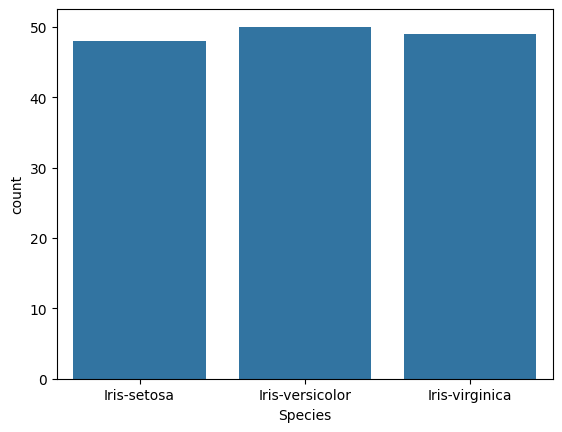

In [ ]:
sns.countplot(x='Species', data=df)
plt.show()

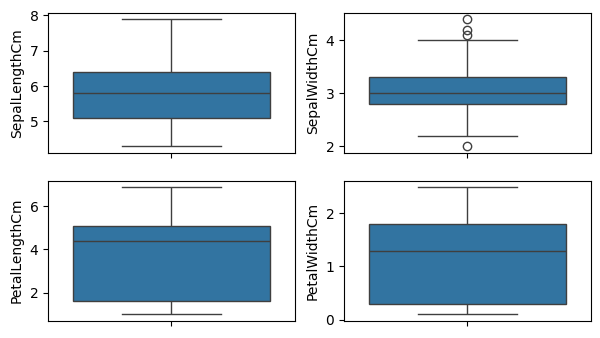

In [ ]:
plt.figure(figsize=(7,4))
plt.subplot(2,2,1)
sns.boxplot(df['SepalLengthCm'])

plt.subplot(2,2,2)
sns.boxplot(df['SepalWidthCm'])

plt.subplot(2,2,3)
sns.boxplot(df['PetalLengthCm'])

plt.subplot(2,2,4)
sns.boxplot(df['PetalWidthCm'])

plt.show()


In [ ]:
df_new = df[(df['SepalWidthCm'] > 2) & (df['SepalWidthCm'] < 4)]
df_new.shape

(142, 5)

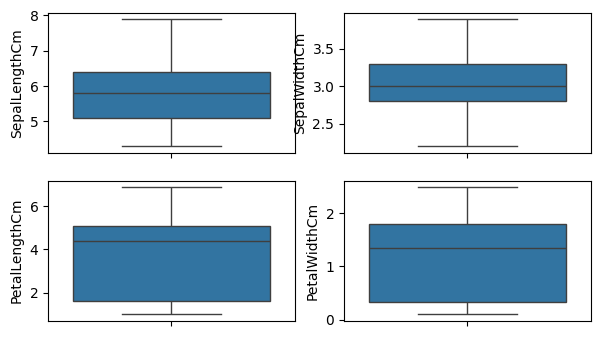

In [ ]:
plt.figure(figsize=(7,4))
plt.subplot(2,2,1)
sns.boxplot(df_new['SepalLengthCm'])

plt.subplot(2,2,2)
sns.boxplot(df_new['SepalWidthCm'])

plt.subplot(2,2,3)
sns.boxplot(df_new['PetalLengthCm'])

plt.subplot(2,2,4)
sns.boxplot(df_new['PetalWidthCm'])

plt.show()

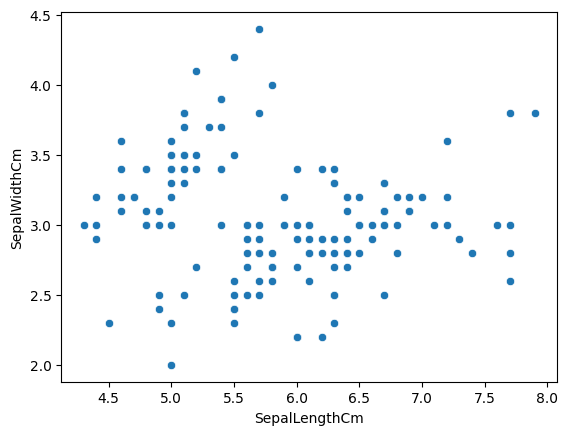

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df)
plt.show()

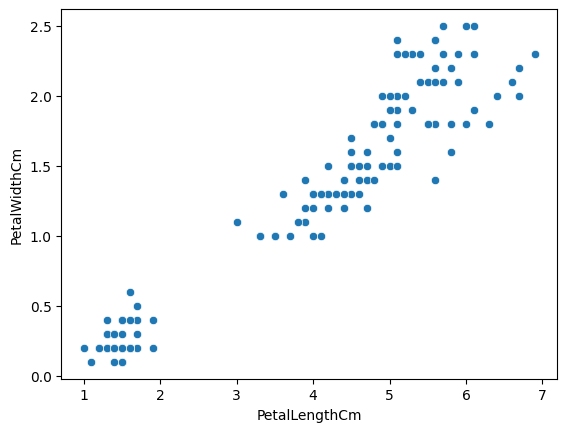

In [ ]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [ ]:
x = df.drop('Species', axis=1)
y = df['Species']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,26)
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(x_train, y_train)
  train_accuracies[neighbor] = knn.score(x_train, y_train)
  test_accuracies[neighbor] = knn.score(x_test, y_test)

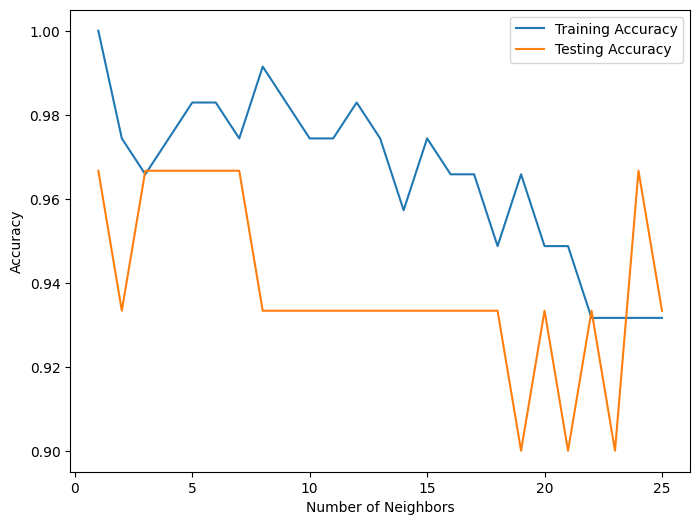

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



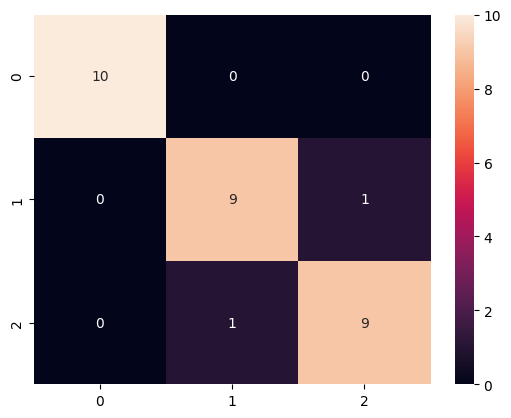

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()